## Notebook for creating plots in fMRI experiment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import os
import pickle
import numpy as np

# sim_name = 'server_shuffle_data_output_validation_seeds'
sim_name = 'final_run_svd'
modalities = 'LR-LR'
figures_path = f'../figures/fmri/task_classification/{sim_name}'
summary_path = f'{figures_path}/summary'
os.makedirs(summary_path, exist_ok=True)


sns.set_style("whitegrid", {'grid.linestyle': '--'})  # Adjust grid style
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{newtxmath} \usepackage{newtxtext} \usepackage{newtxtext}'
plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'

font_name = "Times New Roman"  # Change to any other installed serif font if needed

# Set font properties using the font name
font_properties = font_manager.FontProperties(family=font_name, size=20)


In [57]:
# results_df1 = pd.read_csv(f'{figures_path}/best_all_{modalities}_{sim_name}_1nn.csv')
# results_df2 = pd.read_csv(f'../figures/fmri/task_classification/LR_LR_shuffle_batch_4554_dim_attempt3/best_all_{modalities}_LR_LR_shuffle_batch_4554_dim_attempt3_1nn.csv')
results_df = pd.read_csv(f'{figures_path}/results_merged.csv')

In [58]:
# results_df = pd.concat([results_df1, results_df2], ignore_index=True) 
# results_df = pd.read_csv(f'{figures_path}/best_all_{modalities}_{sim_name}_1nn.csv')


In [59]:
results_df.columns

Index(['method', 'kernel_scale1', 'kernel_scale2', 'dim', 't', 'train_percent',
       'batch_size', 'batch', 'seed', 'zero_diag', 'solver', 'classifier',
       'shuffle_subjects', 'valid_accuracy', 'test_accuracy', 'silhouette_gt',
       'silhouette_pred_test'],
      dtype='object')

In [60]:
# setup plot style
# methods_to_plot = ['ad', 'dm', 'nystrom', 'ncca', 'kcca', 'forward_only', 'ffbb']  # Replace with actual method names
reference_methods = ['ad', 'ad_svd', 'dm']  # methods for performance reference 
# competing_methods = ['nystrom', 'ncca', 'kcca', 'kcca_impute']  # competing methods under the same setting
competing_methods = ['nystrom', 'ncca', 'kcca_impute', 'apmc']  # competing methods under the same setting
best_competing_methods = ['nystrom', 'ncca', 'apmc']  # competing methods under the same setting
# competing_methods = ['nystrom', 'ncca', 'apmc']  # competing methods under the same setting
# our_methods = ['forward_only', 'adm_plus']
our_methods = ['backward_only', 'adm_plus']

method_names = {
    'ad': 'ADM',
    'ad_svd': 'ADM-SVD',
    'dm': 'DM',
    # 'nystrom': 'Nyström',
    'nystrom': 'Dov et al.',
    'apmc': 'APMC',
    'ncca': 'NCCA',
    'kcca': 'KCCA (ChatGPT)',
    'kcca_impute': 'KCCA',
    'forward_only': 'forward only',
    'backward_only': 'backward only',
    'adm_plus': 'ADM+',
    'ffbb': 'ADM+'
}

# Specify the color palette for different methods
palette_reference = {'ad': 'black', 'ad_svd': 'brown', 'dm': 'grey'}  # Reference methods: black and grey
palette_our_methods = {'forward_only': 'blue', 'ffbb': 'dodgerblue', 'adm_plus': 'dodgerblue', 'backward_only': 'cyan'}  # Our methods in shades of blue
palette_competing = {'nystrom': 'green', 'ncca': 'gold', 'kcca': 'violet', 'kcca_impute': 'purple', 'apmc': 'salmon'}  # Competing methods in other colors

# linestyle
linewidth = 3.5
errorbar = 'sd'

# fonts 
legend_fontsize = 26
label_fontsize = 26
tick_fontsize = 32


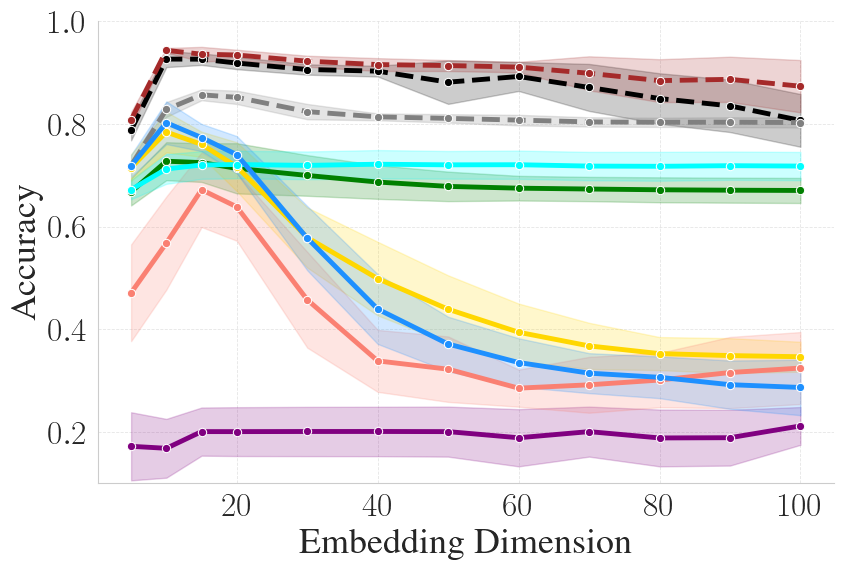

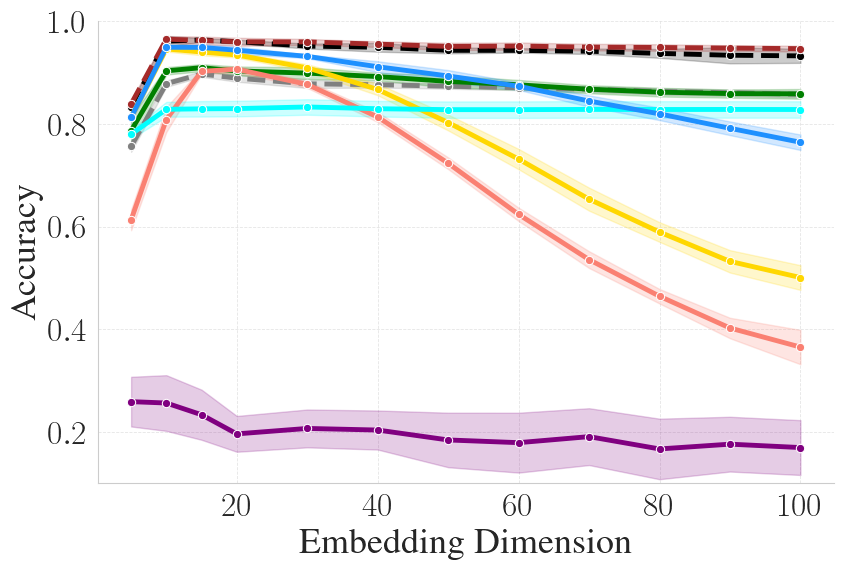

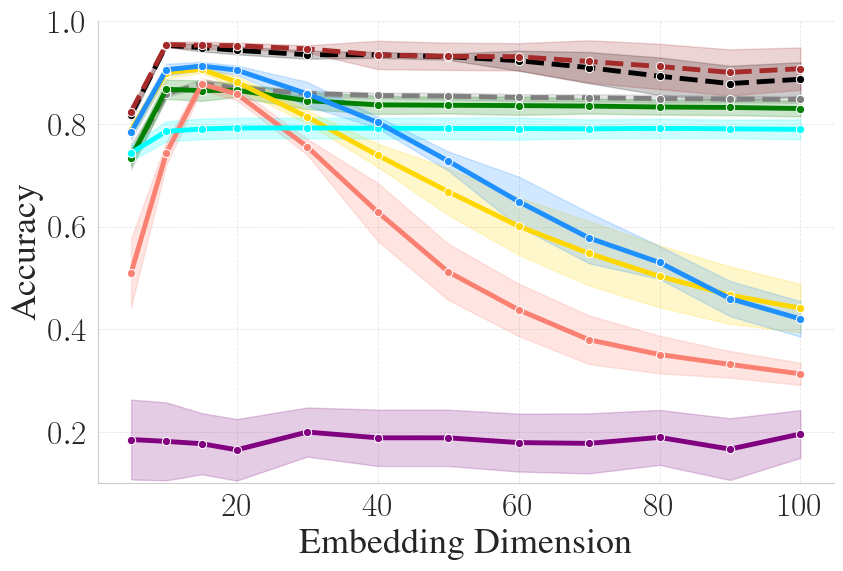

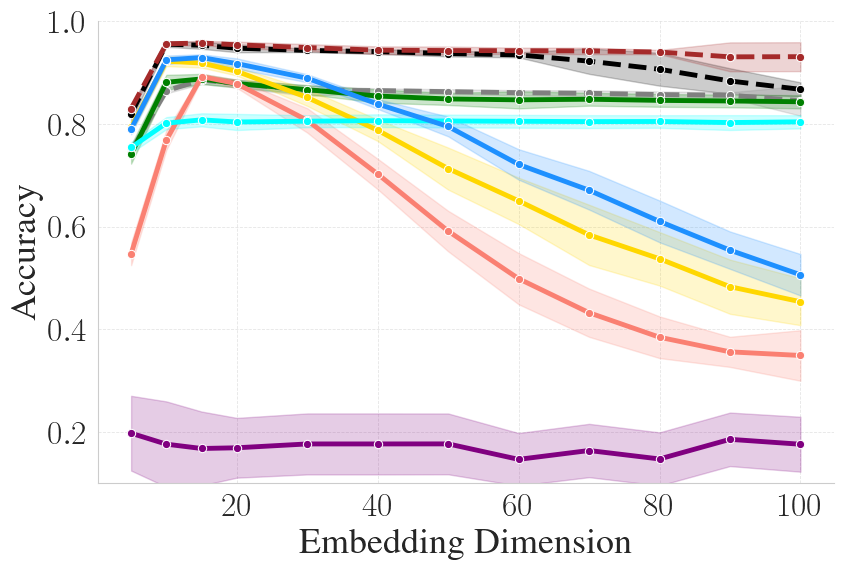

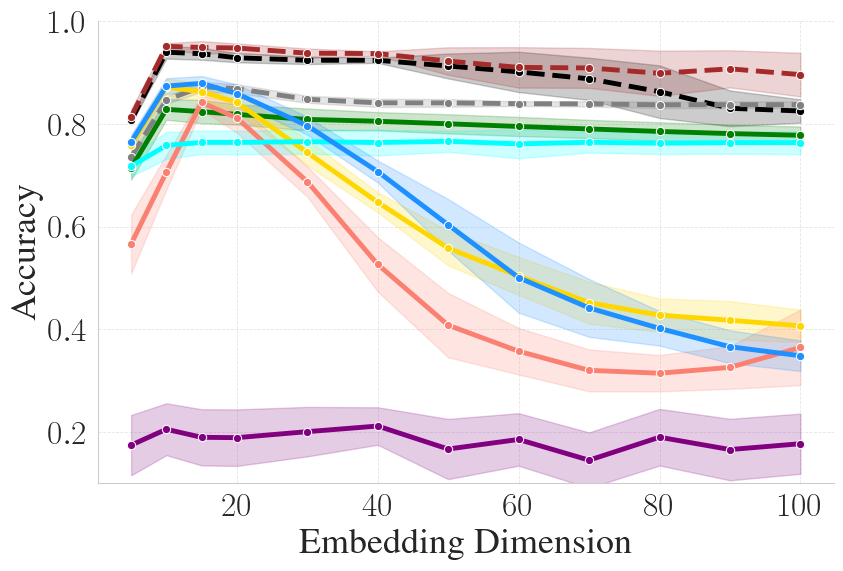

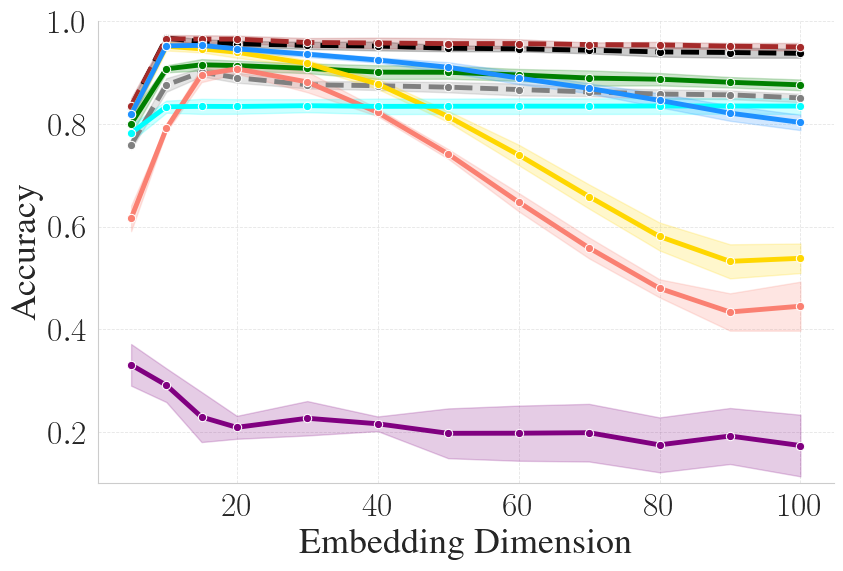

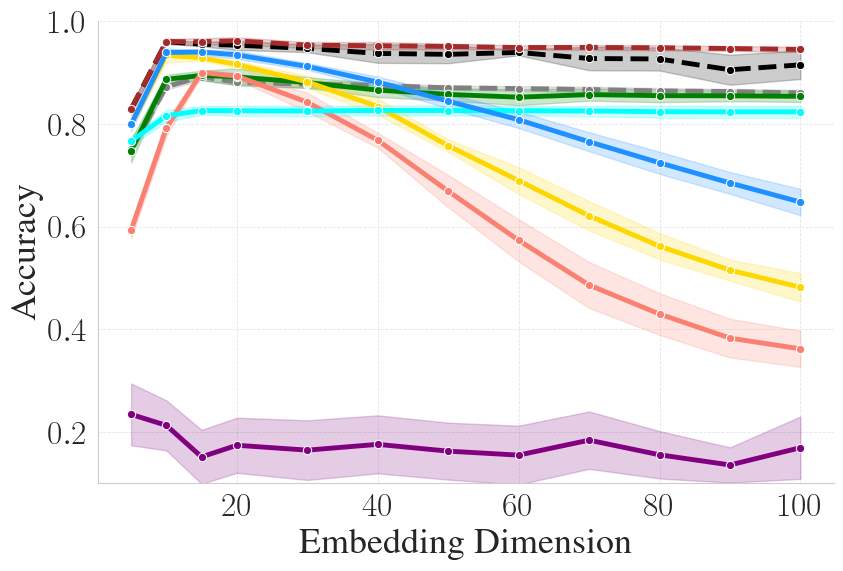

In [74]:
# Set a Seaborn theme for better aesthetics
# sns.set(style="whitegrid")


# Loop over each unique train_percent value
for train_percent in results_df['train_percent'].unique():
    plt.figure(figsize=(9.5, 6))

    # Plot for reference methods with dashed lines
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(reference_methods))]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_reference, linewidth=linewidth,
                      hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

    # Plot for competing methods
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(competing_methods))]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_competing, linewidth=linewidth,
                      hue_order=competing_methods, estimator='mean', errorbar=errorbar)

    # Plot for our methods
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(our_methods))  & (results_df['t'] == 0.1)]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_our_methods, linewidth=linewidth,
                      hue_order=our_methods, estimator='mean', errorbar=errorbar)

    # Plotting accuracy vs. dim for each selected method
    
    # , errorbar=('ci', 0) add for no error bars
    
    # Modify the legend with custom names
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [method_names[label] for label in labels]
    plt.legend(handles, labels, title_fontsize=legend_fontsize, fontsize=legend_fontsize, loc='lower right', frameon=True, prop=font_properties)
    
    # Enhancing the plot
    # plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
    plt.xlabel(r'Embedding Dimension', fontsize=label_fontsize)
    plt.ylabel(r'Accuracy', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
    plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.set_ylim([0.1, 1.0])
    ax.legend().set_visible(False)
    # Adding gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.6)
    
    # Remove the top and right spines for a cleaner look
    sns.despine()
    # plt.rcParams['text.usetex'] = False
    path_str = f'{summary_path}/acc_vs_dim_train_percent_{train_percent}'.replace('.', 'p')
    plt.savefig(f'{summary_path}/acc_vs_dim_train_percent_{train_percent}.pdf', dpi=300, format='pdf', bbox_inches='tight')

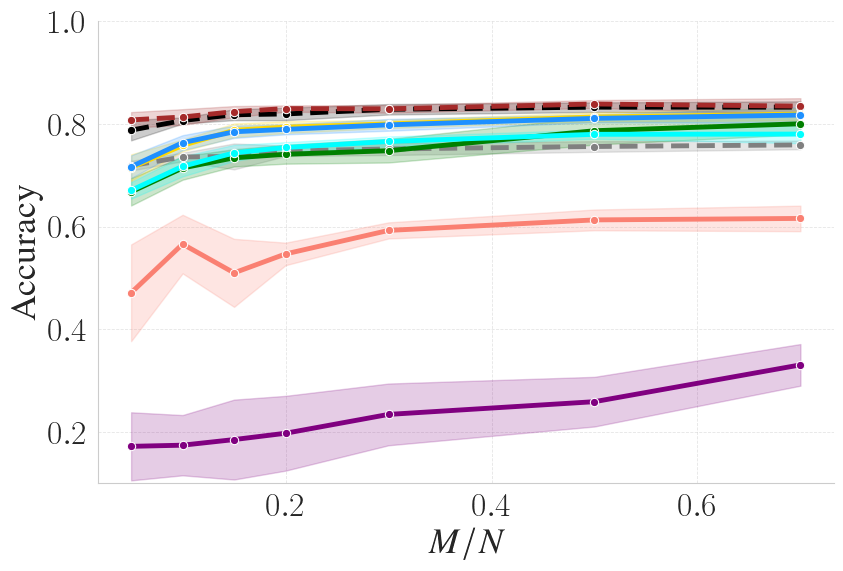

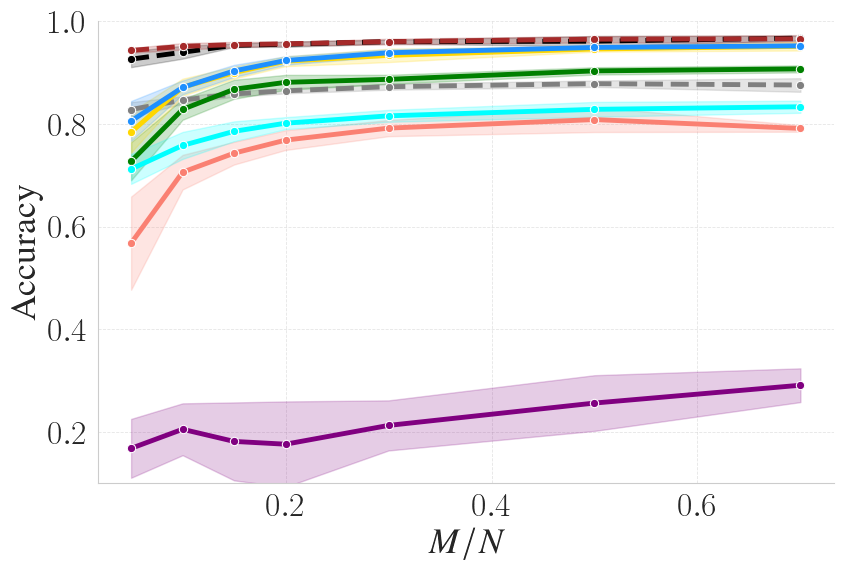

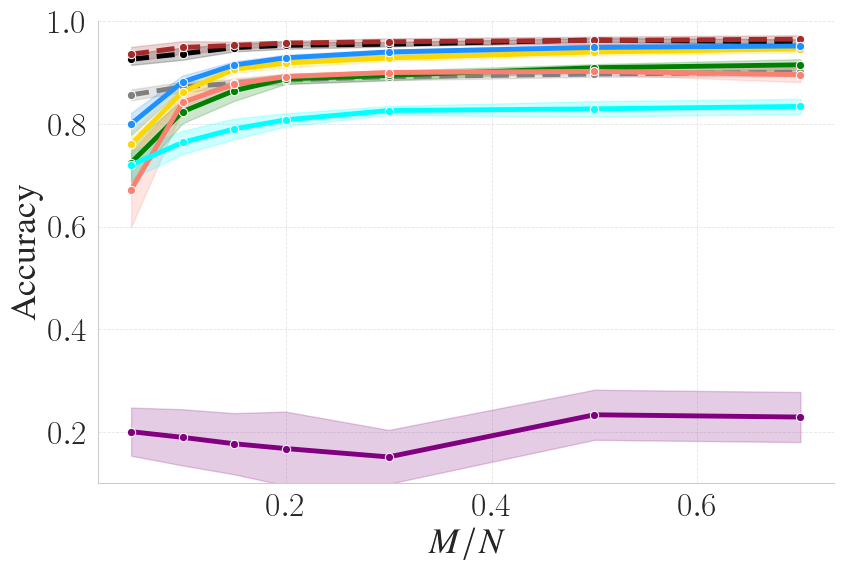

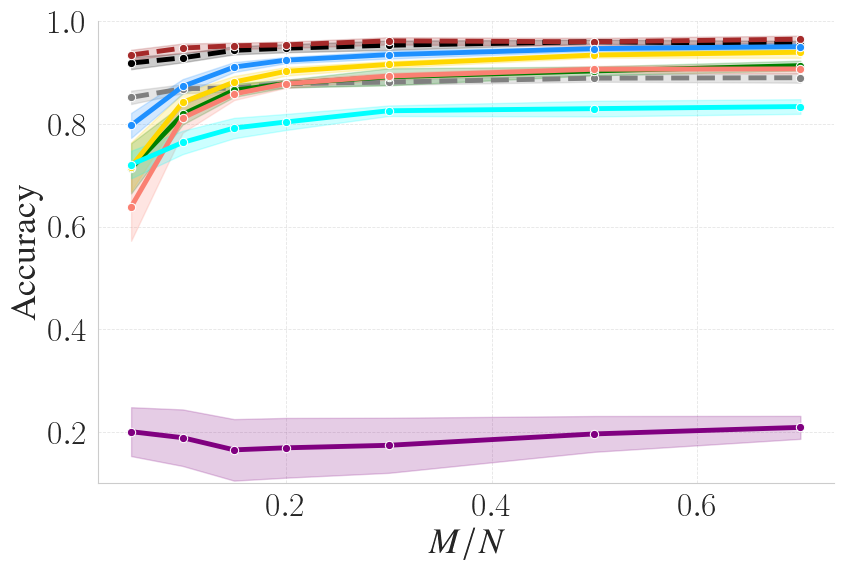

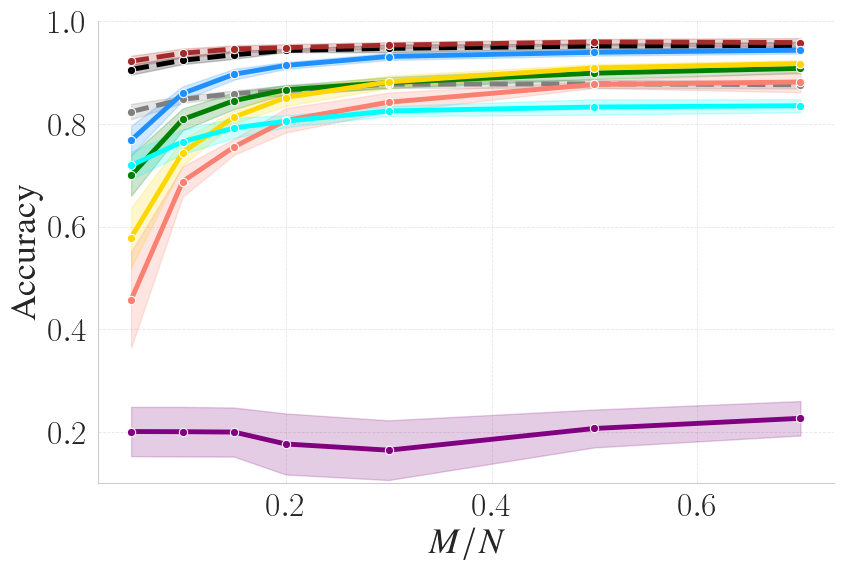

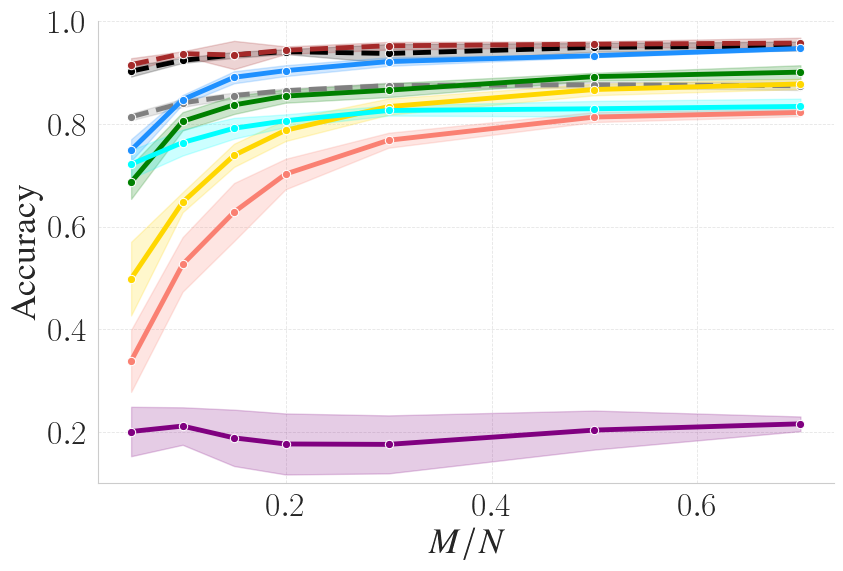

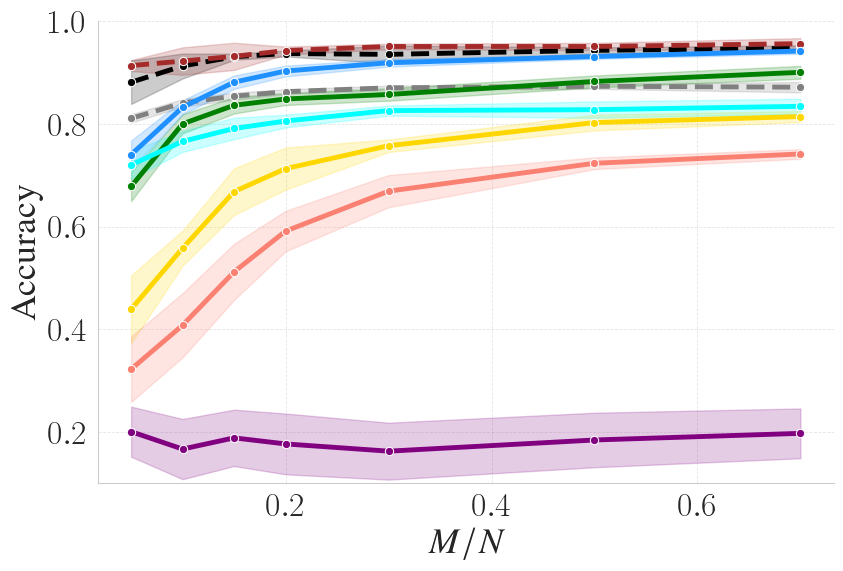

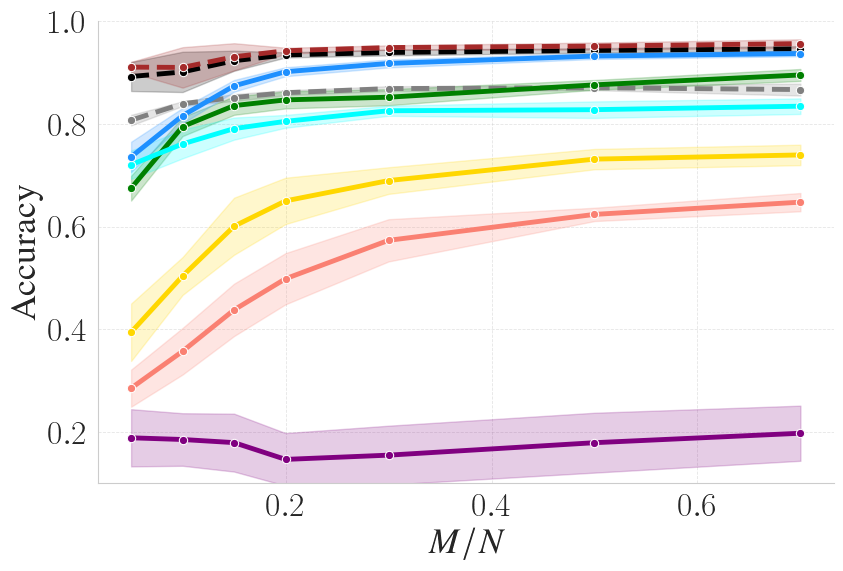

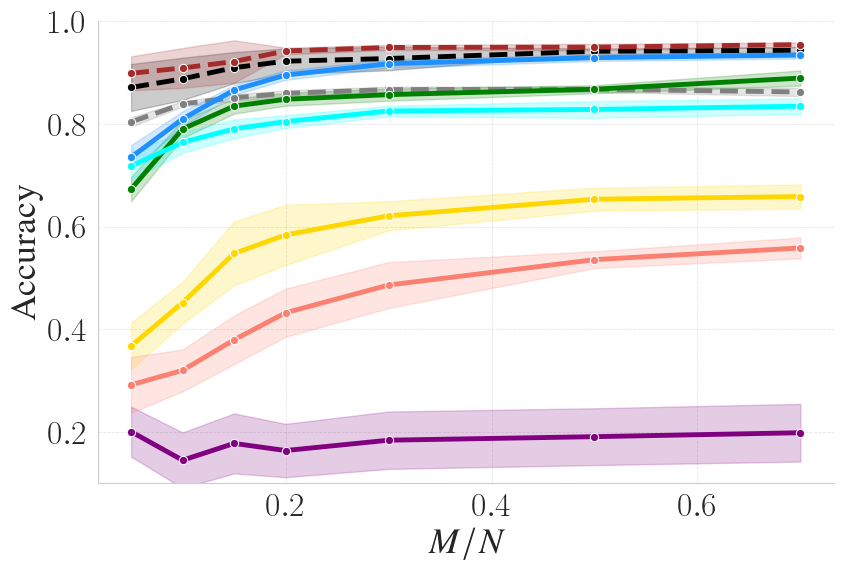

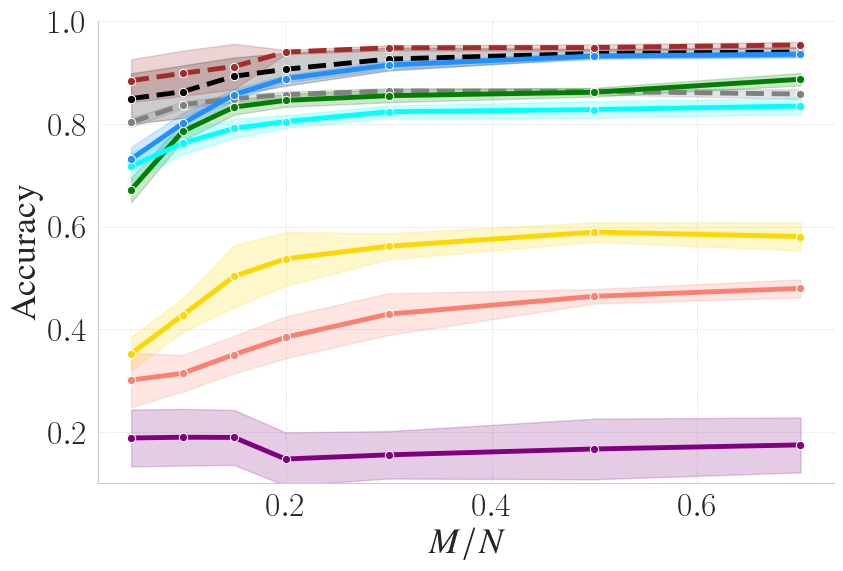

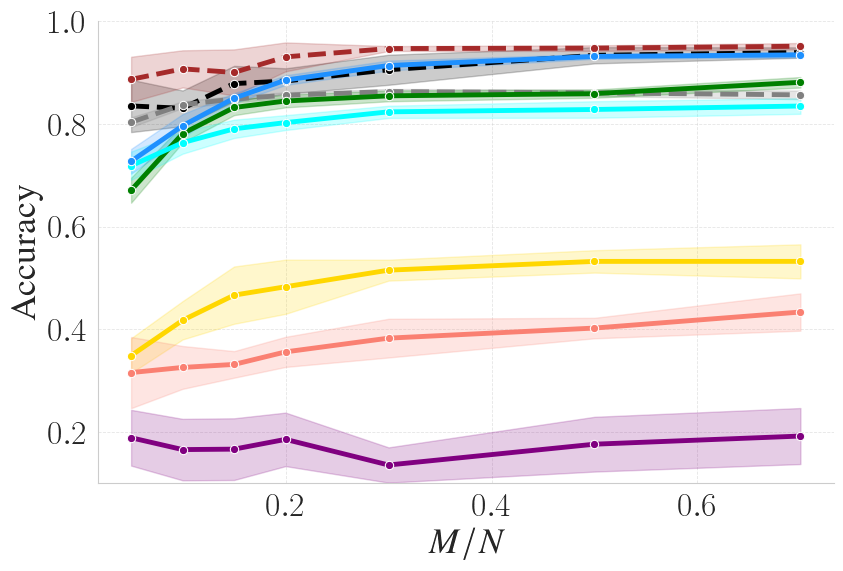

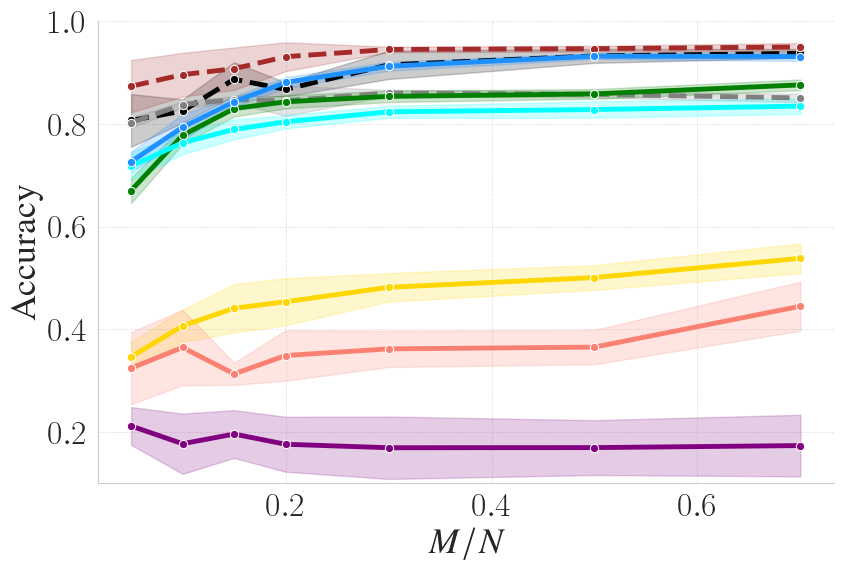

In [35]:
# Loop over each unique train_percent value
for dim in results_df['dim'].unique():
    # plt.rcParams['text.usetex'] = True
    # Filter the dataframe for the current train_percent value and selected methods 
    plt.figure(figsize=(9.5, 6))
    
    # Plot for reference methods with dashed lines
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(reference_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_reference, linewidth=linewidth,
                      hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

    # Plot for competing methods
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(competing_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_competing, linewidth=linewidth,
                      hue_order=competing_methods, estimator='mean', errorbar=errorbar)

    # Plot for our methods
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(our_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_our_methods, linewidth=linewidth,
                      hue_order=our_methods, estimator='mean', errorbar=errorbar)
    
    # Modify the legend with custom names
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [method_names[label] for label in labels]
    plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)
    
    # Enhancing the plot
    # plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
    plt.xlabel(r'$M/N$', fontsize=label_fontsize)
    plt.ylabel(r'Accuracy', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
    plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.set_ylim([0.1, 1.0])
    
    # Adding gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax.legend().set_visible(False)
    # Remove the top and right spines for a cleaner look
    sns.despine()
    # plt.rcParams['text.usetex'] = False
    path_str = f'{summary_path}/acc_vs_train_dim_{dim}'.replace('.', 'p')
    plt.savefig(f'{summary_path}/acc_vs_train_dim_{dim}.pdf', dpi=300, format='pdf', bbox_inches='tight')

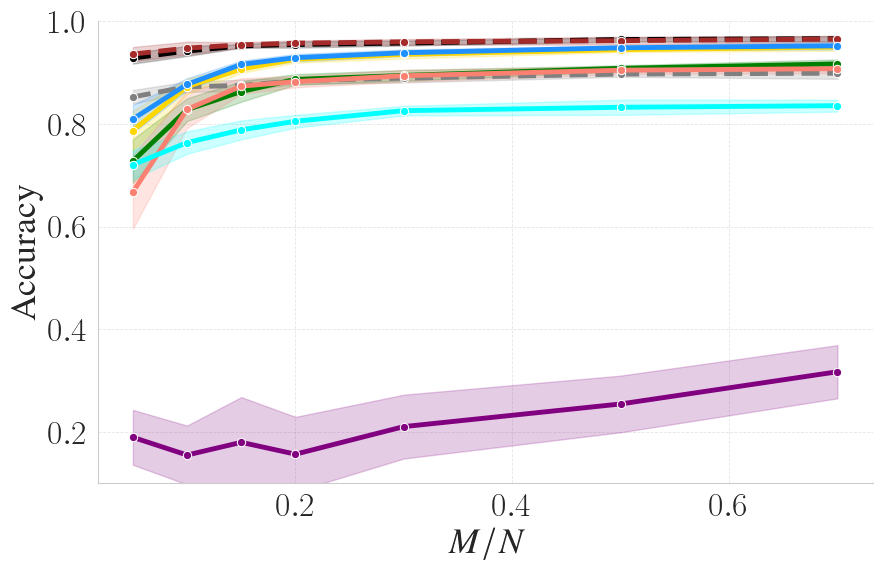

In [36]:
# create plot vs. train with the best dim 
# Loop over each unique train_percent value
# Filter the dataframe for the current train_percent value and selected methods 
plt.figure(figsize=(10, 6))
# calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)

# Enhancing the plot
# plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
# plt.xlabel('Train Size[%]', fontsize=label_fontsize, fontproperties=font_properties)

plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.1, 1.0])

ax.legend().set_visible(False)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.savefig(f'{summary_path}/acc_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

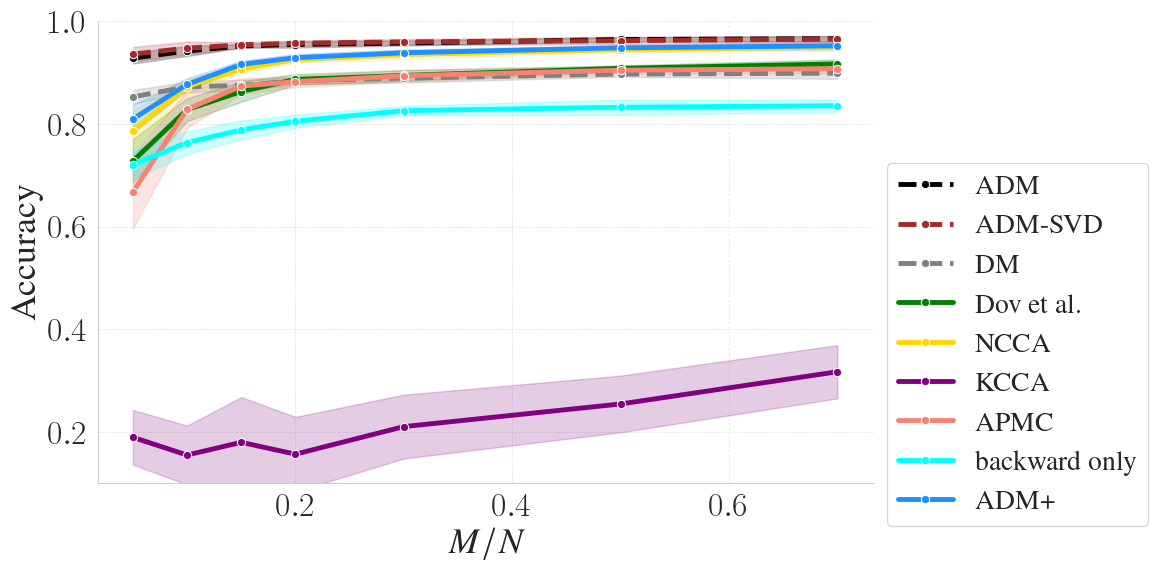

In [37]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(10, 6))

# Calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names and place it outside the figure
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='center left', bbox_to_anchor=(1, 0.3), frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.1, 1.0])

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# # Create a zoomed-in inset in the bottom right corner
# ax_inset = inset_axes(ax, width="30%", height="40%", loc='lower right', bbox_to_anchor=(0.335, 0.63, 1, 0.8), bbox_transform=ax.transAxes)  # Adjust size and position
# ax_inset.set_xlim([0.05, 0.2])
# ax_inset.set_ylim([0.76, 0.93])
# ax_inset.grid(True, which='both', linestyle='--', linewidth=0.6)
# ax_inset.tick_params(axis='x', labelsize=20)
# ax_inset.tick_params(axis='y', labelsize=20)
# 
# # Plot the zoomed-in region
# sns.lineplot(data=df_max[df_max['method'].isin(reference_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_reference, linewidth=linewidth,
#              hue_order=reference_methods, estimator='mean', linestyle='dashed')
# sns.lineplot(data=df_max[df_max['method'].isin(competing_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_competing, linewidth=linewidth,
#              hue_order=competing_methods, estimator='mean')
# sns.lineplot(data=df_max[df_max['method'].isin(our_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_our_methods, linewidth=linewidth,
#              hue_order=our_methods, estimator='mean')
# 
# # Hide the legend and axis titles for the zoomed-in plot
# ax_inset.legend().set_visible(False)
# ax_inset.set_xlabel('')
# ax_inset.set_ylabel('')
# Save the plot
plt.savefig(f'{summary_path}/acc_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

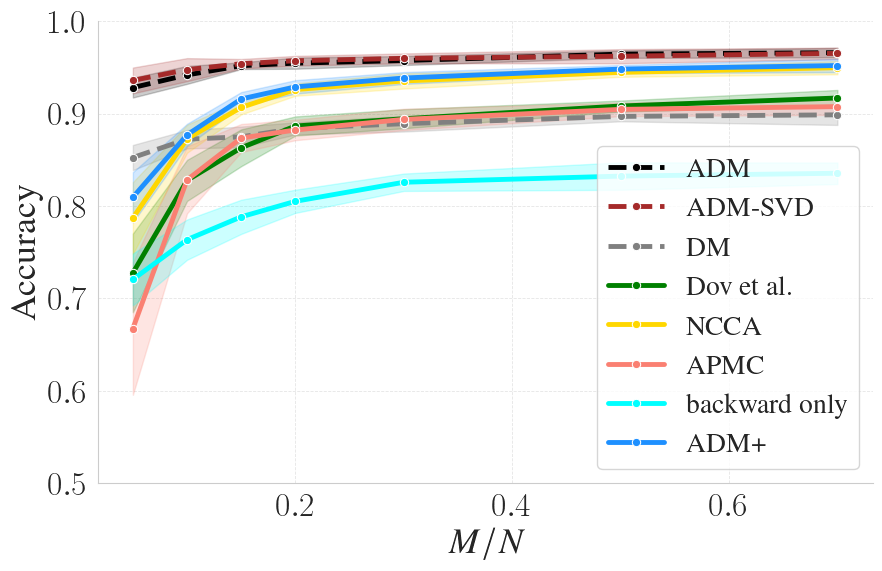

In [38]:
plt.figure(figsize=(10, 6))

# Calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(best_competing_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=best_competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names and place it outside the figure
# handles, labels = plt.gca().get_legend_handles_labels()
# labels = [method_names[label] for label in labels]
# plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='center left', bbox_to_anchor=(1, 0.3), frameon=True, prop=font_properties)
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=26, fontsize=26, loc='lower right', frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.5, 1.0])

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# Save the plot
plt.savefig(f'{summary_path}/acc_vs_train_dim_best_zoom.pdf', dpi=300, format='pdf', bbox_inches='tight')

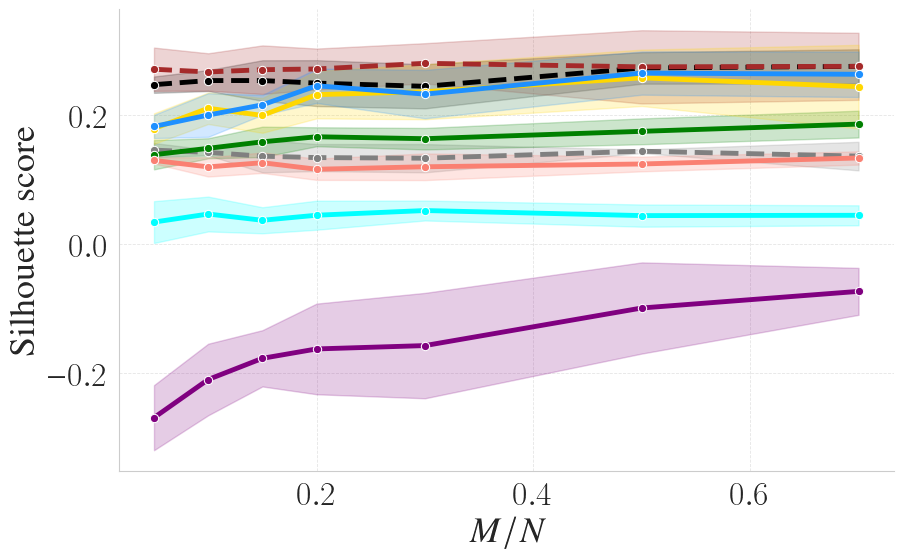

In [39]:
# create plot vs. train with the best dim 
# Loop over each unique train_percent value
# Filter the dataframe for the current train_percent value and selected methods 
plt.figure(figsize=(10, 6))
# calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)

# Enhancing the plot
# plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
# plt.xlabel('Train Size[%]', fontsize=label_fontsize, fontproperties=font_properties)

plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Silhouette score', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)


ax.legend().set_visible(False)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.savefig(f'{summary_path}/silhouette_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

# tSNE plots

In [40]:
def get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path):
    selected_df = results_df[(results_df['dim'] == dim) & (results_df['method'] == method) & 
                             (results_df['train_percent'] == train_percent) & (results_df['seed'] == seed)]
    t = selected_df['t'].values[0]
    scale1 = selected_df['kernel_scale1'].values[0]
    # convert to int format for display
    scale1 = scale1 if scale1 != int(scale1) else int(scale1)
    scale2 = selected_df['kernel_scale2'].values[0]
    scale2 = scale2 if scale2 != int(scale2) else int(scale2)
    batch = selected_df['batch'].values[0]
    directory = f'batch_{batch}_method_{method}_s1_{scale1}_s2_{scale2}_train_percent_{train_percent}'.replace('.', 'p')
    with open(f'{figures_path}/{directory}/data_seed_{seed}.pkl', 'rb') as fp:
        embed_data = pickle.load(fp)
    vecs = embed_data['vecs']
    vals = embed_data['vals']
    if method in {'ncca', 'kcca'}:
        embed = vecs[:, :dim]
    else:
        embed = np.real((vals[1:dim + 1] ** t) * vecs[:, 1:dim + 1])
    ref_indicator = embed_data['ref_indicator']
    labels = embed_data['labels_batch']
    tasks_list = embed_data['tasks_list']
    return embed, ref_indicator, labels, tasks_list, selected_df

In [41]:
# plotting parameters
show_legend = False
point_size = 10
fontsize = 24
figsize = (8, 7)
seed = 0
train_percent = 0.3
train_percent_str = f'{train_percent}'.replace('.', 'p')

,method,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,solver,classifier,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
2190,adm_plus,10.0,10.0,20,0.1,0.3,4554,0,0,False,arpack,knn,True,0.951648,0.930479,0.194806,0.191063


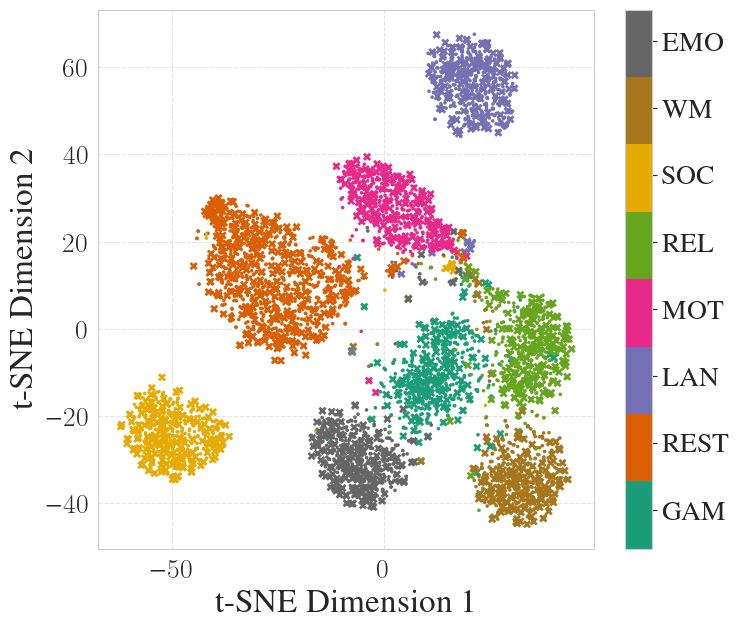

In [42]:
from helper_functions.plotting_funcs import plot_embed_tsne
dim = 20
method = 'adm_plus'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne_tpercent_{train_percent_str}.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

,method,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,solver,classifier,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
510,ad,0.5,0.5,20,0.2,0.3,4554,0,0,False,arpack,knn,True,0.964835,0.961581,0.189416,0.18645


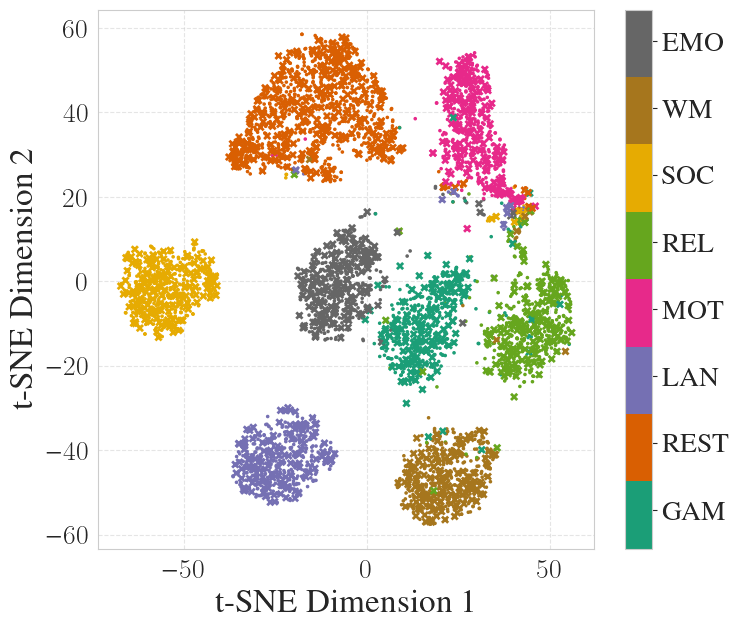

In [22]:
dim = 20
method = 'ad'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

,method,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,solver,classifier,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
8070,ncca,10.0,10.0,20,0.0,0.3,4554,0,0,False,arpack,knn,True,0.925275,0.913282,0.149757,0.142384


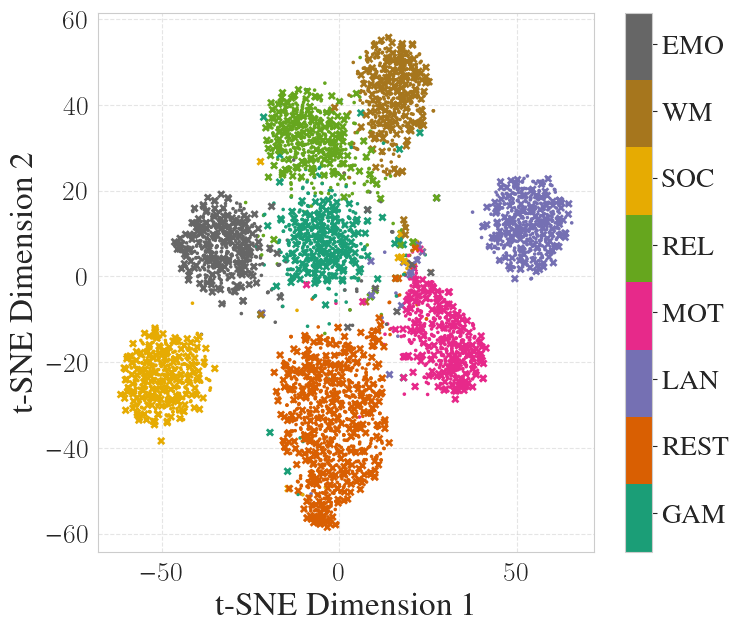

In [23]:
dim = 20
method = 'ncca'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne_tpercent_{train_percent_str}.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

,method,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,solver,classifier,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
8910,nystrom,10.0,10.0,20,0.5,0.3,4554,0,0,False,arpack,knn,True,0.918681,0.905232,0.166127,0.161411


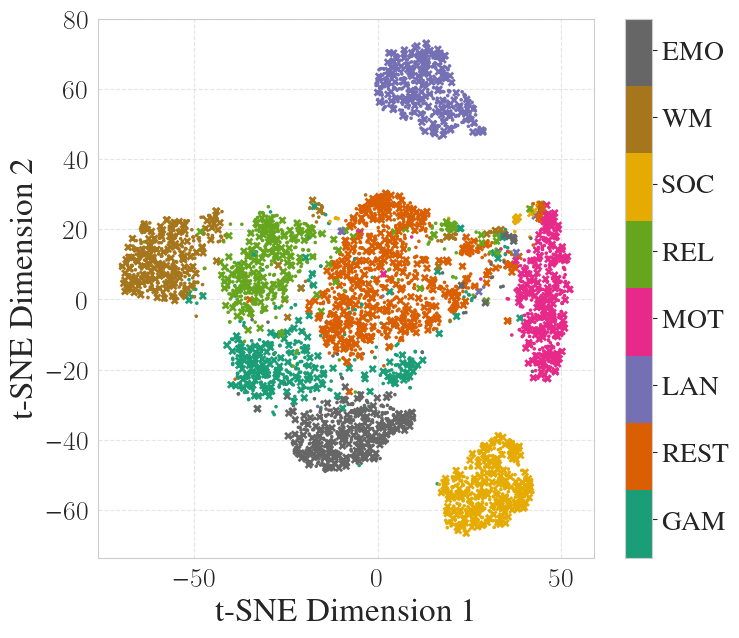

In [29]:
dim = 20
method = 'nystrom'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

,method,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,solver,classifier,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
3510,backward_only,10.0,10.0,20,0.1,0.1,4554,0,0,False,arpack,knn,True,0.797802,0.779363,0.085518,0.097853


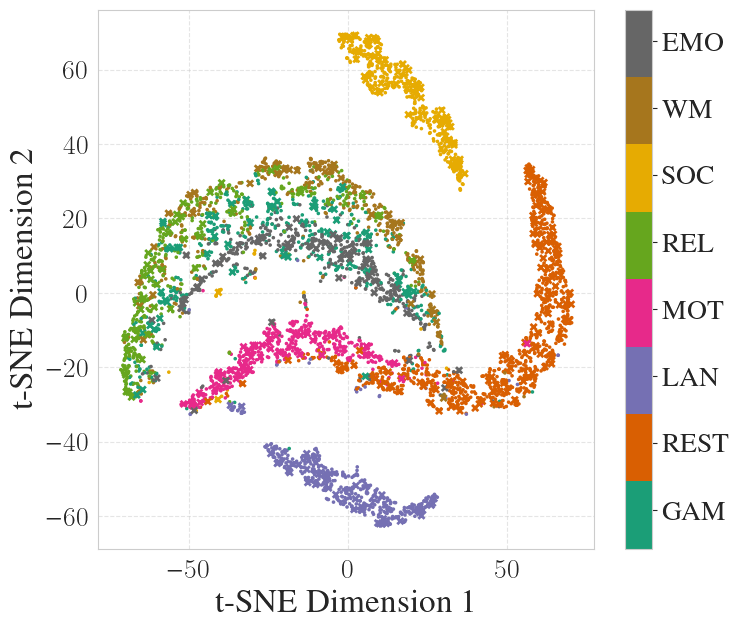

In [32]:
dim = 20
method = 'backward_only'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, 0.1, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

In [18]:
results_df.groupby('method').max('accuracy')

,kernel_scale1,kernel_scale2,dim,t,train_percent,batch_size,batch,seed,zero_diag,shuffle_subjects,valid_accuracy,test_accuracy,silhouette_gt,silhouette_pred_test
method,,,,,,,,,,,,,,
ad,2.0,2.0,100,1.0,0.7,4554,0,123,False,True,0.989011,0.975851,0.315223,0.320439
adm_plus,2.0,2.0,100,0.5,0.7,4554,0,123,False,True,0.975824,0.963776,0.321210,0.310341
apmc,2.0,2.0,100,0.0,0.7,4554,0,123,False,True,0.931868,0.919868,0.159159,0.290687
backward_only,2.0,2.0,100,0.3,0.7,4554,0,123,False,True,0.870330,0.855104,0.099035,0.107295
dm,2.0,2.0,100,2.0,0.7,4554,0,123,False,True,0.931868,0.912184,0.161613,0.170162
forward_only,2.0,2.0,100,0.3,0.7,4554,0,123,False,True,0.870330,0.858397,0.112199,0.121961
kcca,2.0,2.0,100,0.0,0.7,4554,0,123,False,True,0.674725,0.653677,0.120009,0.954006
kcca_impute,2.0,2.0,100,0.0,0.7,4554,0,123,False,True,0.417582,0.402854,0.084937,0.957328
ncca,2.0,2.0,100,0.0,0.7,4554,0,123,False,True,0.967033,0.961581,0.320638,0.326205
